In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#### Data preprocessing

In [3]:
# Fetch MNIST dataset from OpenML and split it into features (data) and labels

In [4]:
data,labels = fetch_openml(name='mnist_784',return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# Split the dataset into training and testing sets
# using the first 49000 samples for training and the rest for testing
np.random.seed(42)
x_train,x_test,y_train,y_test = data[:49000].to_numpy(),data[49000:].to_numpy(),labels[:49000].to_numpy(),labels[49000:].to_numpy()

In [6]:
x_trainarr,x_testarr,y_trainarr,y_testarr = train_test_split(data,labels,test_size = 0.3, shuffle =True, random_state = 42)

In [7]:
x_train.mean(axis = 1)

array([35.10841837, 39.6619898 , 24.7997449 , ..., 46.9502551 ,
       23.89668367, 28.77678571])

In [8]:
# Find indices of samples labeled as '6' and '9' in the training labels
i_6 = np.where(y_train=='6')[0]
i_9 = np.where(y_train=='9')[0]
# Extract samples and labels corresponding to '6' and '9' from the training set
x_6 = x_train[i_6]
x_9 = x_train[i_9]
y_6 = y_train[i_6]
y_9 = y_train[i_9]
# Concatenate '6' and '9' samples and labels to create binary classification dataset
x_train_69_t = np.row_stack((x_6,x_9))
y_train_69_l = np.concatenate((y_6,y_9))
# Convert labels to binary format: '6' -> 1, '9' -> 0
y_train_69_n = np.where(y_train_69_l=='6',1,0)
i_6[0].shape

()

In [9]:
i_6

array([   13,    18,    32, ..., 48958, 48994, 48999])

In [10]:
# Repeat the process for the test set

In [11]:
i_6_test = np.where(y_test=='6')[0]
i_9_test = np.where(y_test=='9')[0]
x_6_test = x_test[i_6_test]
x_9_test = x_test[i_9_test]
y_6_test = y_test[i_6_test]
y_9_test = y_test[i_9_test]
x_test_69_t = np.row_stack((x_6_test,x_9_test))
y_test_69_l = np.concatenate((y_6_test,y_9_test))
y_test_69_n = np.where(y_test_69_l=='6',1,0)
np.bincount(y_train_69_n)

array([4891, 4855])

In [12]:
# Shuffle the training and testing datasets and labels for balanced distribution
from sklearn.utils import shuffle
x_train_69,y_train_69 = shuffle(x_train_69_t,y_train_69_n,random_state=1729)
x_test_69,y_test_69 = shuffle(x_test_69_t,y_test_69_n,random_state=1729)
np.sum(y_train_69,axis=0)

4855

In [13]:
# Standardize features by removing the mean and scaling to unit variance
SS = StandardScaler()
x_train_69Tf = SS.fit_transform(x_train_69)
np.mean(x_train_69Tf,axis=1)[0],np.mean(x_train_69Tf,axis=0)[0],np.std(x_train_69Tf,axis=1)[0],np.std(x_train_69Tf,axis=0)[0]

(0.08128379559427823, 0.0, 0.7358823226037738, 0.0)

#### Partial fit

In [14]:
# Create SGDClassifier instances with different configurations

In [15]:
# SGDClassifier with logistic loss, warm_start enabled, and constant learning rate
# Parameters: loss='log', warm_start=True, random_state=10
SGD = SGDClassifier(loss='log',warm_start=True,random_state=10)

# SGDClassifier with logistic loss, warm_start enabled, constant learning rate, and specified initial learning rate (eta0)
# Parameters: loss='log', warm_start=True, eta0=0.01, random_state=10, learning_rate='constant'
SGD1 = SGDClassifier(loss='log',warm_start=True,eta0=0.01,random_state=10,learning_rate = 'constant')

# SGDClassifier with logistic loss, warm_start enabled, constant learning rate, and a smaller initial learning rate (eta0)
# Parameters: loss='log', warm_start=True, eta0=0.000001, random_state=10, learning_rate='constant'
SGD2 = SGDClassifier(loss='log',warm_start = True,eta0=0.000001,random_state=10,learning_rate = 'constant')

# SGDClassifier with logistic loss, warm_start enabled, constant learning rate, and specified initial learning rate (eta0)
# Parameters: loss='log', warm_start=True, eta0=0.01, random_state=10, learning_rate='constant'
SGD3 = SGDClassifier(loss='log',warm_start= True,eta0=0.01,random_state=10, learning_rate = 'constant')

# SGDClassifier with logistic loss, warm_start enabled, invscaling learning rate, and specified parameters for invscaling
# Parameters: loss='log', warm_start=True, eta0=0.01, learning_rate='invscaling', power_t=1, random_state=10
SGD4 = SGDClassifier(loss='log',warm_start = True,eta0=0.01,learning_rate='invscaling',power_t=1,random_state=10)

In [16]:
# Initialize empty lists to store loss values for each SGDClassifier instance
loss,loss1,loss2,loss3,loss4 = [],[],[],[],[]
for i in range(10):
  # Partially fit each SGDClassifier instance on the binary training data
  SGD.partial_fit(x_train_69,y_train_69,classes=[0,1])
  SGD1.partial_fit(x_train_69,y_train_69,classes=[0,1])
  SGD2.partial_fit(x_train_69,y_train_69,classes=[0,1])
  SGD3.partial_fit(x_train_69Tf,y_train_69,classes=[0,1])
  SGD4.partial_fit(x_train_69,y_train_69,classes=[0,1])

  # Predict probabilities for the binary training data using each SGDClassifier instance
  p1 = SGD.predict_proba(x_train_69)
  p2 = SGD1.predict_proba(x_train_69)
  p3 = SGD2.predict_proba(x_train_69)
  p4 = SGD3.predict_proba(x_train_69Tf)
  p5 = SGD4.predict_proba(x_train_69)

  # Calculate log loss for each SGDClassifier instance and epoch
  l1 = log_loss(y_train_69,p1)
  l2 = log_loss(y_train_69,p2)
  l3 = log_loss(y_train_69,p3)
  l4 = log_loss(y_train_69,p4)
  l5 = log_loss(y_train_69,p5)

  # Append log loss values to respective lists
  loss.append(l1)
  loss1.append(l2)
  loss2.append(l3)
  loss3.append(l4)
  loss4.append(l5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

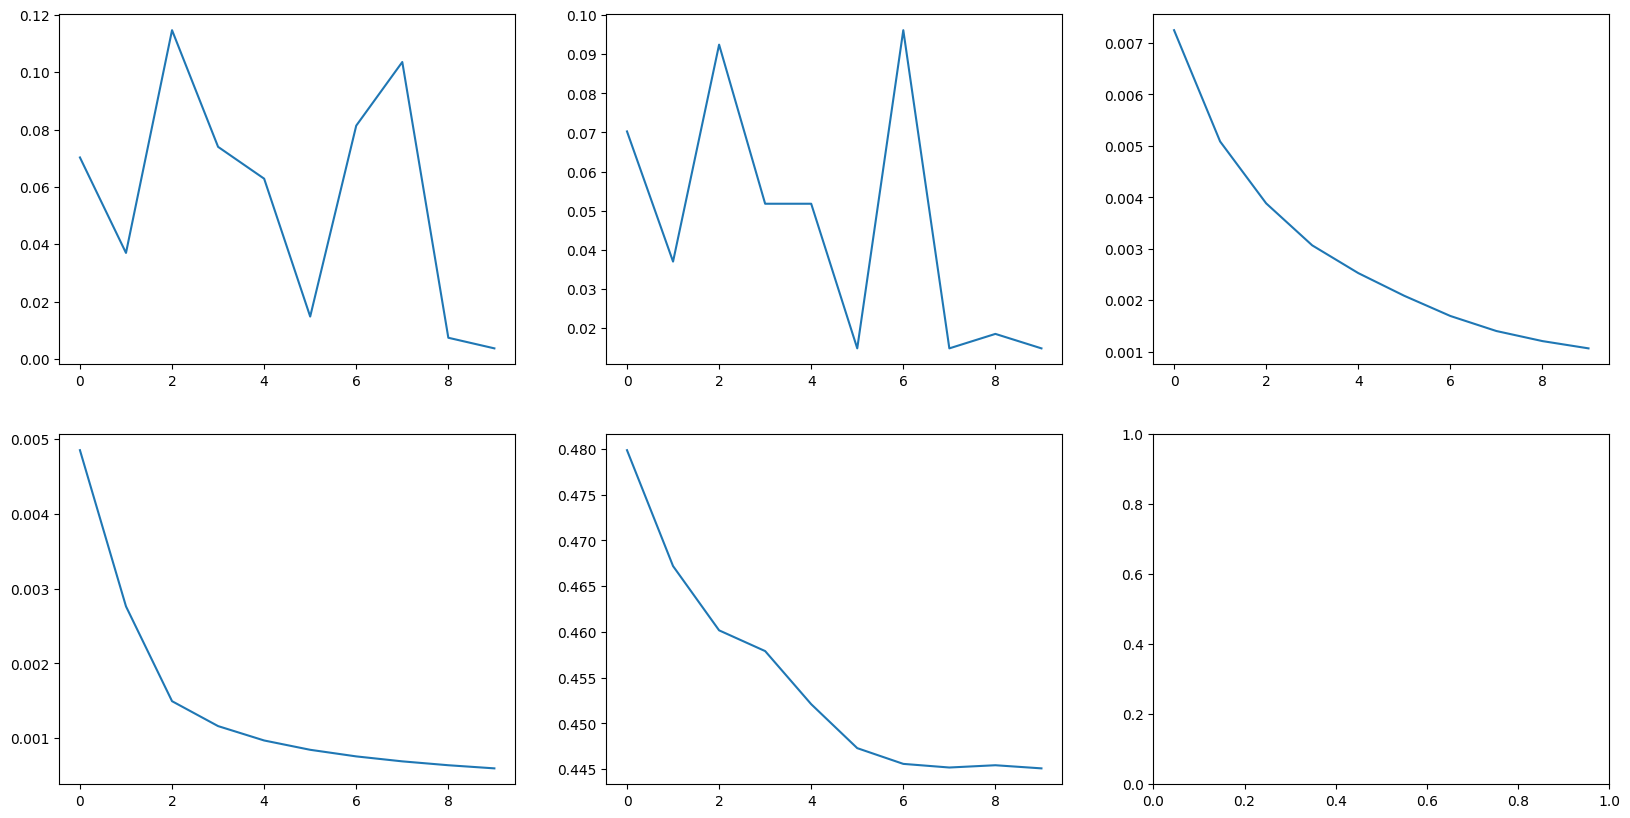

In [17]:
def learning_curve(List1,List2,List3,List4,List5):
  iter = np.arange(10)
  f,(ax1,ax2) = plt.subplots(2,3,figsize=(20,10))
  ax1[0].plot(iter,List1)
  ax1[1].plot(iter,List2)
  ax1[2].plot(iter,List3)
  ax2[0].plot(iter,List4)
  ax2[1].plot(iter,List5)
  plt.show()
learning_curve(loss,loss1,loss2,loss3,loss4)

#### Predict proba

In [18]:
SGD_n = SGDClassifier(loss='log',warm_start=True,max_iter=1,random_state=10)
SGD_n1 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.01,learning_rate='constant',random_state=10)
SGD_n2 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.000001,learning_rate='constant',random_state=10)
SGD_n3 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.01,learning_rate='constant',random_state=10)
SGD_n4 = SGDClassifier(loss='log',warm_start=True,max_iter=1,eta0=0.01,learning_rate='invscaling',power_t=1.0,random_state=10)

In [19]:
loss_n,loss_n1,loss_n2,loss_n3,loss_n4 = [],[],[],[],[]
for i in range(10):
  SGD_n.fit(x_train_69,y_train_69)
  SGD_n1.fit(x_train_69,y_train_69)
  SGD_n2.fit(x_train_69,y_train_69)
  SGD_n3.fit(x_train_69,y_train_69)
  SGD_n4.fit(x_train_69,y_train_69)
  pn1 = SGD_n.predict_proba(x_train_69)
  pn2 = SGD_n1.predict_proba(x_train_69)
  pn3 = SGD_n2.predict_proba(x_train_69)
  pn4 = SGD_n3.predict_proba(x_train_69)
  pn5 = SGD_n4.predict_proba(x_train_69)
  ln1 = log_loss(y_train_69,pn1)
  ln2 = log_loss(y_train_69,pn2)
  ln3 = log_loss(y_train_69,pn3)
  ln4 = log_loss(y_train_69,pn4)
  ln5 = log_loss(y_train_69,pn5)
  loss_n.append(ln1)
  loss_n1.append(ln2)
  loss_n2.append(ln3)
  loss_n3.append(ln4)
  loss_n4.append(ln5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

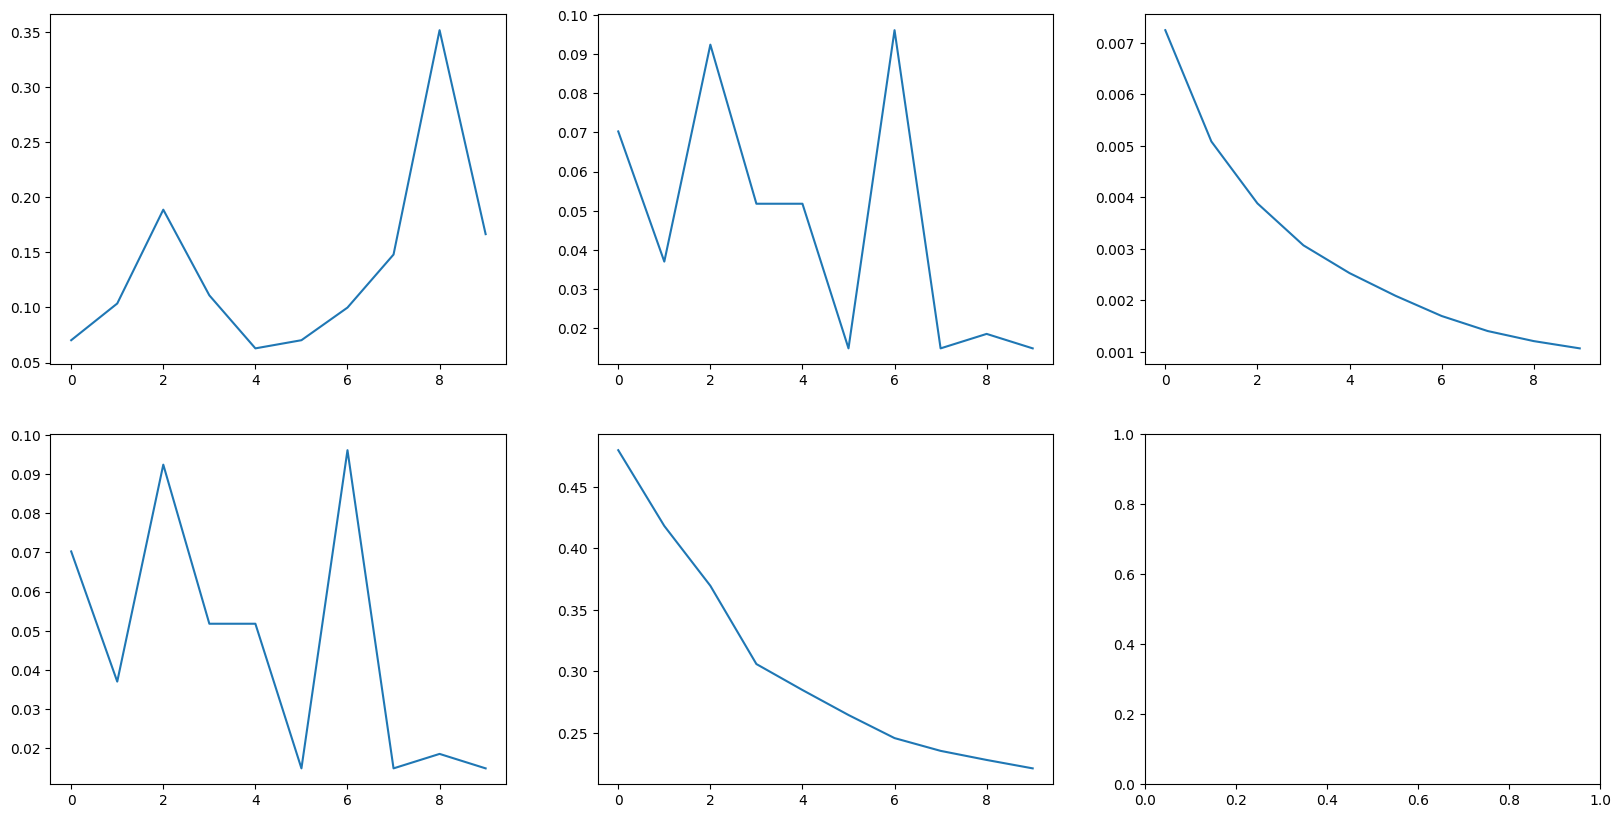

In [20]:
learning_curve(loss_n,loss_n1,loss_n2,loss_n3,loss_n4)